In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.linear_model import LinearRegression
from sklearn.cluster import KMeans
import scipy.stats as stats
from scipy.stats import poisson
from scipy.optimize import minimize

# Load the data
data = pd.read_csv('/content/Motor_Vehicle_Collisions_-_Crashes.csv',low_memory=False)


In [ ]:
!pip install -q feature_engine autoviz dataprep 2>/dev/null

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 12.1/12.1 MB 28.0 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 3.1/3.1 MB 45.2 MB/s eta 0:00:00


In [ ]:
from dataprep.datasets import load_dataset
from dataprep.eda import create_report

In [ ]:
import numpy as np
import folium

In [ ]:
print(data.shape)
data.head()

(2035207, 29)


,CRASH DATE,CRASH TIME,BOROUGH,ZIP CODE,LATITUDE,LONGITUDE,LOCATION,ON STREET NAME,CROSS STREET NAME,OFF STREET NAME,...,CONTRIBUTING FACTOR VEHICLE 2,CONTRIBUTING FACTOR VEHICLE 3,CONTRIBUTING FACTOR VEHICLE 4,CONTRIBUTING FACTOR VEHICLE 5,COLLISION_ID,VEHICLE TYPE CODE 1,VEHICLE TYPE CODE 2,VEHICLE TYPE CODE 3,VEHICLE TYPE CODE 4,VEHICLE TYPE CODE 5
0,09/11/2021,2:39,NaN,NaN,NaN,NaN,NaN,WHITESTONE EXPRESSWAY,20 AVENUE,NaN,...,Unspecified,NaN,NaN,NaN,4455765,Sedan,Sedan,NaN,NaN,NaN
1,03/26/2022,11:45,NaN,NaN,NaN,NaN,NaN,QUEENSBORO BRIDGE UPPER,NaN,NaN,...,NaN,NaN,NaN,NaN,4513547,Sedan,NaN,NaN,NaN,NaN
2,06/29/2022,6:55,NaN,NaN,NaN,NaN,NaN,THROGS NECK BRIDGE,NaN,NaN,...,Unspecified,NaN,NaN,NaN,4541903,Sedan,Pick-up Truck,NaN,NaN,NaN
3,09/11/2021,9:35,BROOKLYN,11208,40.667202,-73.866500,"(40.667202, -73.8665)",NaN,NaN,1211 LORING AVENUE,...,NaN,NaN,NaN,NaN,4456314,Sedan,NaN,NaN,NaN,NaN
4,12/14/2021,8:13,BROOKLYN,11233,40.683304,-73.917274,"(40.683304, -73.917274)",SARATOGA AVENUE,DECATUR STREET,NaN,...,NaN,NaN,NaN,NaN,4486609,NaN,NaN,NaN,NaN,NaN


# Data Cleaning

In [ ]:
print("Initial Missing Values:\n", data.isnull().sum())

Initial Missing Values:
 CRASH DATE                             0
CRASH TIME                             0
BOROUGH                           633150
ZIP CODE                          633392
LATITUDE                          230979
LONGITUDE                         230979
LOCATION                          230979
ON STREET NAME                    429487
CROSS STREET NAME                 764111
OFF STREET NAME                  1698093
NUMBER OF PERSONS INJURED             18
NUMBER OF PERSONS KILLED              31
NUMBER OF PEDESTRIANS INJURED          0
NUMBER OF PEDESTRIANS KILLED           0
NUMBER OF CYCLIST INJURED              0
NUMBER OF CYCLIST KILLED               0
NUMBER OF MOTORIST INJURED             0
NUMBER OF MOTORIST KILLED              0
CONTRIBUTING FACTOR VEHICLE 1       6456
CONTRIBUTING FACTOR VEHICLE 2     311738
CONTRIBUTING FACTOR VEHICLE 3    1890578
CONTRIBUTING FACTOR VEHICLE 4    2002717
CONTRIBUTING FACTOR VEHICLE 5    2026414
COLLISION_ID                    

In [ ]:
# Calculate the total number of people injured
data['Total number of people injured'] = (
    data['NUMBER OF PERSONS INJURED'] +
    data['NUMBER OF PEDESTRIANS INJURED'] +
    data['NUMBER OF CYCLIST INJURED'] +
    data['NUMBER OF MOTORIST INJURED']
)

# Calculate the total number of people killed
data['Total number of people killed'] = (
    data['NUMBER OF PERSONS KILLED'] +
    data['NUMBER OF PEDESTRIANS KILLED'] +
    data['NUMBER OF CYCLIST KILLED'] +
    data['NUMBER OF MOTORIST KILLED']
)

# Drop the columns that were used to calculate the totals
data.drop(columns=[
    'NUMBER OF PERSONS INJURED',
    'NUMBER OF PEDESTRIANS INJURED',
    'NUMBER OF CYCLIST INJURED',
    'NUMBER OF MOTORIST INJURED',
    'NUMBER OF PERSONS KILLED',
    'NUMBER OF PEDESTRIANS KILLED',
    'NUMBER OF CYCLIST KILLED',
    'NUMBER OF MOTORIST KILLED'
], inplace=True)

data.head()

,CRASH DATE,CRASH TIME,BOROUGH,ZIP CODE,LATITUDE,LONGITUDE,LOCATION,ON STREET NAME,CROSS STREET NAME,OFF STREET NAME,...,CONTRIBUTING FACTOR VEHICLE 4,CONTRIBUTING FACTOR VEHICLE 5,COLLISION_ID,VEHICLE TYPE CODE 1,VEHICLE TYPE CODE 2,VEHICLE TYPE CODE 3,VEHICLE TYPE CODE 4,VEHICLE TYPE CODE 5,Total number of people injured,Total number of people killed
0,09/11/2021,2:39,NaN,NaN,NaN,NaN,NaN,WHITESTONE EXPRESSWAY,20 AVENUE,NaN,...,NaN,NaN,4455765,Sedan,Sedan,NaN,NaN,NaN,4.0,0.0
1,03/26/2022,11:45,NaN,NaN,NaN,NaN,NaN,QUEENSBORO BRIDGE UPPER,NaN,NaN,...,NaN,NaN,4513547,Sedan,NaN,NaN,NaN,NaN,2.0,0.0
2,06/29/2022,6:55,NaN,NaN,NaN,NaN,NaN,THROGS NECK BRIDGE,NaN,NaN,...,NaN,NaN,4541903,Sedan,Pick-up Truck,NaN,NaN,NaN,0.0,0.0
3,09/11/2021,9:35,BROOKLYN,11208,40.667202,-73.866500,"(40.667202, -73.8665)",NaN,NaN,1211 LORING AVENUE,...,NaN,NaN,4456314,Sedan,NaN,NaN,NaN,NaN,0.0,0.0
4,12/14/2021,8:13,BROOKLYN,11233,40.683304,-73.917274,"(40.683304, -73.917274)",SARATOGA AVENUE,DECATUR STREET,NaN,...,NaN,NaN,4486609,NaN,NaN,NaN,NaN,NaN,0.0,0.0


In [ ]:
data.drop(columns=[
    'ZIP CODE',
    'LOCATION',
    'ON STREET NAME',
    'CROSS STREET NAME',
    'OFF STREET NAME',
    'CONTRIBUTING FACTOR VEHICLE 3',
    'CONTRIBUTING FACTOR VEHICLE 4',
    'CONTRIBUTING FACTOR VEHICLE 5',
    'COLLISION_ID',
    'VEHICLE TYPE CODE 3',
    'VEHICLE TYPE CODE 4',
    'VEHICLE TYPE CODE 5'
], inplace=True)

In [ ]:
data.head()

,CRASH DATE,CRASH TIME,BOROUGH,LATITUDE,LONGITUDE,CONTRIBUTING FACTOR VEHICLE 1,CONTRIBUTING FACTOR VEHICLE 2,VEHICLE TYPE CODE 1,VEHICLE TYPE CODE 2,Total number of people injured,Total number of people killed
0,09/11/2021,2:39,NaN,NaN,NaN,Aggressive Driving/Road Rage,Unspecified,Sedan,Sedan,4.0,0.0
1,03/26/2022,11:45,NaN,NaN,NaN,Pavement Slippery,NaN,Sedan,NaN,2.0,0.0
2,06/29/2022,6:55,NaN,NaN,NaN,Following Too Closely,Unspecified,Sedan,Pick-up Truck,0.0,0.0
3,09/11/2021,9:35,BROOKLYN,40.667202,-73.866500,Unspecified,NaN,Sedan,NaN,0.0,0.0
4,12/14/2021,8:13,BROOKLYN,40.683304,-73.917274,NaN,NaN,NaN,NaN,0.0,0.0


In [ ]:
data.dropna(subset=['LATITUDE', 'LONGITUDE','CONTRIBUTING FACTOR VEHICLE 1'], inplace=True)
data.head()

,CRASH DATE,CRASH TIME,BOROUGH,LATITUDE,LONGITUDE,CONTRIBUTING FACTOR VEHICLE 1,CONTRIBUTING FACTOR VEHICLE 2,VEHICLE TYPE CODE 1,VEHICLE TYPE CODE 2,Total number of people injured,Total number of people killed
3,09/11/2021,9:35,BROOKLYN,40.667202,-73.866500,Unspecified,NaN,Sedan,NaN,0.0,0.0
6,12/14/2021,17:05,NaN,40.709183,-73.956825,Passing Too Closely,Unspecified,Sedan,Tractor Truck Diesel,0.0,0.0
7,12/14/2021,8:17,BRONX,40.868160,-73.831480,Unspecified,Unspecified,Sedan,Sedan,4.0,0.0
8,12/14/2021,21:10,BROOKLYN,40.671720,-73.897100,Driver Inexperience,Unspecified,Sedan,NaN,0.0,0.0
9,12/14/2021,14:58,MANHATTAN,40.751440,-73.973970,Passing Too Closely,Unspecified,Sedan,Station Wagon/Sport Utility Vehicle,0.0,0.0


In [ ]:
data.shape



(1798366, 11)

In [ ]:
print("Initial Missing Values:\n", data.isnull().sum())

Initial Missing Values:
 CRASH DATE                             0
CRASH TIME                             0
BOROUGH                           437598
LATITUDE                               0
LONGITUDE                              0
CONTRIBUTING FACTOR VEHICLE 1          0
CONTRIBUTING FACTOR VEHICLE 2     275982
VEHICLE TYPE CODE 1                 8289
VEHICLE TYPE CODE 2               344004
Total number of people injured        13
Total number of people killed         23
dtype: int64


In [ ]:
# Function to determine borough based on known ranges
def determine_borough(lat, long, known_borough_data):
    for borough, bounds in known_borough_data.items():
        if bounds['lat_min'] <= lat <= bounds['lat_max'] and bounds['long_min'] <= long <= bounds['long_max']:
            return borough
    return None

# Analyze known data to determine latitude and longitude bounds for each borough
known_borough_data = {}
for borough in data['BOROUGH'].dropna().unique():
    borough_data = data[data['BOROUGH'] == borough]
    known_borough_data[borough] = {
        'lat_min': borough_data['LATITUDE'].min(),
        'lat_max': borough_data['LATITUDE'].max(),
        'long_min': borough_data['LONGITUDE'].min(),
        'long_max': borough_data['LONGITUDE'].max()
    }

# Infer missing boroughs
for index, row in data[data['BOROUGH'].isna()].iterrows():
    lat, long = row['LATITUDE'], row['LONGITUDE']
    data.at[index, 'BOROUGH'] = determine_borough(lat, long, known_borough_data)

In [ ]:
data.head()

,CRASH DATE,CRASH TIME,BOROUGH,LATITUDE,LONGITUDE,CONTRIBUTING FACTOR VEHICLE 1,CONTRIBUTING FACTOR VEHICLE 2,VEHICLE TYPE CODE 1,VEHICLE TYPE CODE 2,Total number of people injured,Total number of people killed
3,09/11/2021,9:35,BROOKLYN,40.667202,-73.866500,Unspecified,NaN,Sedan,NaN,0.0,0.0
6,12/14/2021,17:05,BROOKLYN,40.709183,-73.956825,Passing Too Closely,Unspecified,Sedan,Tractor Truck Diesel,0.0,0.0
7,12/14/2021,8:17,BRONX,40.868160,-73.831480,Unspecified,Unspecified,Sedan,Sedan,4.0,0.0
8,12/14/2021,21:10,BROOKLYN,40.671720,-73.897100,Driver Inexperience,Unspecified,Sedan,NaN,0.0,0.0
9,12/14/2021,14:58,MANHATTAN,40.751440,-73.973970,Passing Too Closely,Unspecified,Sedan,Station Wagon/Sport Utility Vehicle,0.0,0.0


In [ ]:
print("Initial Missing Values:\n", data.isnull().sum())

Initial Missing Values:
 CRASH DATE                             0
CRASH TIME                             0
BOROUGH                              122
LATITUDE                               0
LONGITUDE                              0
CONTRIBUTING FACTOR VEHICLE 1          0
CONTRIBUTING FACTOR VEHICLE 2     275982
VEHICLE TYPE CODE 1                 8289
VEHICLE TYPE CODE 2               344004
Total number of people injured        13
Total number of people killed         23
dtype: int64


In [ ]:
data.dropna(subset=['BOROUGH'], inplace=True)
data.head()
print("Initial Missing Values:\n", data.isnull().sum())

Initial Missing Values:
 CRASH DATE                             0
CRASH TIME                             0
BOROUGH                                0
LATITUDE                               0
LONGITUDE                              0
CONTRIBUTING FACTOR VEHICLE 1          0
CONTRIBUTING FACTOR VEHICLE 2     275966
VEHICLE TYPE CODE 1                 8289
VEHICLE TYPE CODE 2               343987
Total number of people injured        13
Total number of people killed         23
dtype: int64


In [ ]:
columns_to_replace = ['CONTRIBUTING FACTOR VEHICLE 2', 'VEHICLE TYPE CODE 1','VEHICLE TYPE CODE 2']  # Specify the columns you want to replace NaN with 'null'
for column in columns_to_replace:
    data[column].replace(np.nan, 'null', inplace=True)

In [ ]:
data.head()

,CRASH DATE,CRASH TIME,BOROUGH,LATITUDE,LONGITUDE,CONTRIBUTING FACTOR VEHICLE 1,CONTRIBUTING FACTOR VEHICLE 2,VEHICLE TYPE CODE 1,VEHICLE TYPE CODE 2,Total number of people injured,Total number of people killed
3,09/11/2021,9:35,BROOKLYN,40.667202,-73.866500,Unspecified,null,Sedan,null,0.0,0.0
6,12/14/2021,17:05,BROOKLYN,40.709183,-73.956825,Passing Too Closely,Unspecified,Sedan,Tractor Truck Diesel,0.0,0.0
7,12/14/2021,8:17,BRONX,40.868160,-73.831480,Unspecified,Unspecified,Sedan,Sedan,4.0,0.0
8,12/14/2021,21:10,BROOKLYN,40.671720,-73.897100,Driver Inexperience,Unspecified,Sedan,null,0.0,0.0
9,12/14/2021,14:58,MANHATTAN,40.751440,-73.973970,Passing Too Closely,Unspecified,Sedan,Station Wagon/Sport Utility Vehicle,0.0,0.0


In [ ]:
print("Initial Missing Values:\n", data.isnull().sum())

Initial Missing Values:
 CRASH DATE                         0
CRASH TIME                         0
BOROUGH                            0
LATITUDE                           0
LONGITUDE                          0
CONTRIBUTING FACTOR VEHICLE 1      0
CONTRIBUTING FACTOR VEHICLE 2      0
VEHICLE TYPE CODE 1                0
VEHICLE TYPE CODE 2                0
Total number of people injured    13
Total number of people killed     23
dtype: int64


## Replacing NaN with median values

In [ ]:
median_value = data['Total number of people injured'].median()

# Fill missing values in the column with the median value
data['Total number of people injured'].fillna(median_value, inplace=True)

print("Initial Missing Values:\n", data.isnull().sum())

Initial Missing Values:
 CRASH DATE                         0
CRASH TIME                         0
BOROUGH                            0
LATITUDE                           0
LONGITUDE                          0
CONTRIBUTING FACTOR VEHICLE 1      0
CONTRIBUTING FACTOR VEHICLE 2      0
VEHICLE TYPE CODE 1                0
VEHICLE TYPE CODE 2                0
Total number of people injured     0
Total number of people killed     23
dtype: int64


In [ ]:
median_value = data['Total number of people killed'].median()

# Fill missing values in the column with the median value
data['Total number of people killed'].fillna(median_value, inplace=True)

print("Initial Missing Values:\n", data.isnull().sum())

Initial Missing Values:
 CRASH DATE                        0
CRASH TIME                        0
BOROUGH                           0
LATITUDE                          0
LONGITUDE                         0
CONTRIBUTING FACTOR VEHICLE 1     0
CONTRIBUTING FACTOR VEHICLE 2     0
VEHICLE TYPE CODE 1               0
VEHICLE TYPE CODE 2               0
Total number of people injured    0
Total number of people killed     0
dtype: int64


In [ ]:
data['CRASH DATETIME'] = pd.to_datetime(data['CRASH DATE'] + ' ' + data['CRASH TIME'])

In [ ]:
# Create a new column for the day of the week
# 'day_name()' method returns the day names
data['day_of_week'] = data['CRASH DATETIME'].dt.day_name()

In [ ]:
data.head()

,CRASH DATE,CRASH TIME,BOROUGH,LATITUDE,LONGITUDE,CONTRIBUTING FACTOR VEHICLE 1,CONTRIBUTING FACTOR VEHICLE 2,VEHICLE TYPE CODE 1,VEHICLE TYPE CODE 2,Total number of people injured,Total number of people killed,CRASH DATETIME,day_of_week
3,09/11/2021,9:35,BROOKLYN,40.667202,-73.866500,Unspecified,null,Sedan,null,0.0,0.0,2021-09-11 09:35:00,Saturday
6,12/14/2021,17:05,BROOKLYN,40.709183,-73.956825,Passing Too Closely,Unspecified,Sedan,Tractor Truck Diesel,0.0,0.0,2021-12-14 17:05:00,Tuesday
7,12/14/2021,8:17,BRONX,40.868160,-73.831480,Unspecified,Unspecified,Sedan,Sedan,4.0,0.0,2021-12-14 08:17:00,Tuesday
8,12/14/2021,21:10,BROOKLYN,40.671720,-73.897100,Driver Inexperience,Unspecified,Sedan,null,0.0,0.0,2021-12-14 21:10:00,Tuesday
9,12/14/2021,14:58,MANHATTAN,40.751440,-73.973970,Passing Too Closely,Unspecified,Sedan,Station Wagon/Sport Utility Vehicle,0.0,0.0,2021-12-14 14:58:00,Tuesday


In [ ]:
data = data.drop(['CRASH DATE', 'CRASH TIME'], axis=1)

data.head()


,BOROUGH,LATITUDE,LONGITUDE,CONTRIBUTING FACTOR VEHICLE 1,CONTRIBUTING FACTOR VEHICLE 2,VEHICLE TYPE CODE 1,VEHICLE TYPE CODE 2,Total number of people injured,Total number of people killed,CRASH DATETIME,day_of_week
3,BROOKLYN,40.667202,-73.866500,Unspecified,null,Sedan,null,0.0,0.0,2021-09-11 09:35:00,Saturday
6,BROOKLYN,40.709183,-73.956825,Passing Too Closely,Unspecified,Sedan,Tractor Truck Diesel,0.0,0.0,2021-12-14 17:05:00,Tuesday
7,BRONX,40.868160,-73.831480,Unspecified,Unspecified,Sedan,Sedan,4.0,0.0,2021-12-14 08:17:00,Tuesday
8,BROOKLYN,40.671720,-73.897100,Driver Inexperience,Unspecified,Sedan,null,0.0,0.0,2021-12-14 21:10:00,Tuesday
9,MANHATTAN,40.751440,-73.973970,Passing Too Closely,Unspecified,Sedan,Station Wagon/Sport Utility Vehicle,0.0,0.0,2021-12-14 14:58:00,Tuesday


In [ ]:
print(data.dtypes)

BOROUGH                                   object
LATITUDE                                 float64
LONGITUDE                                float64
CONTRIBUTING FACTOR VEHICLE 1             object
CONTRIBUTING FACTOR VEHICLE 2             object
VEHICLE TYPE CODE 1                       object
VEHICLE TYPE CODE 2                       object
Total number of people injured           float64
Total number of people killed            float64
CRASH DATETIME                    datetime64[ns]
day_of_week                               object
dtype: object


# Number of collisions by Day of the week

In [ ]:
day_wise = data.groupby(['day_of_week']).size().reset_index(name='No of Collisions')
day_wise.head()

,day_of_week,No of Collisions
0,Friday,286951
1,Monday,256893
2,Saturday,242726
3,Sunday,215858
4,Thursday,268569


<Axes: xlabel='day_of_week', ylabel='No of Collisions'>

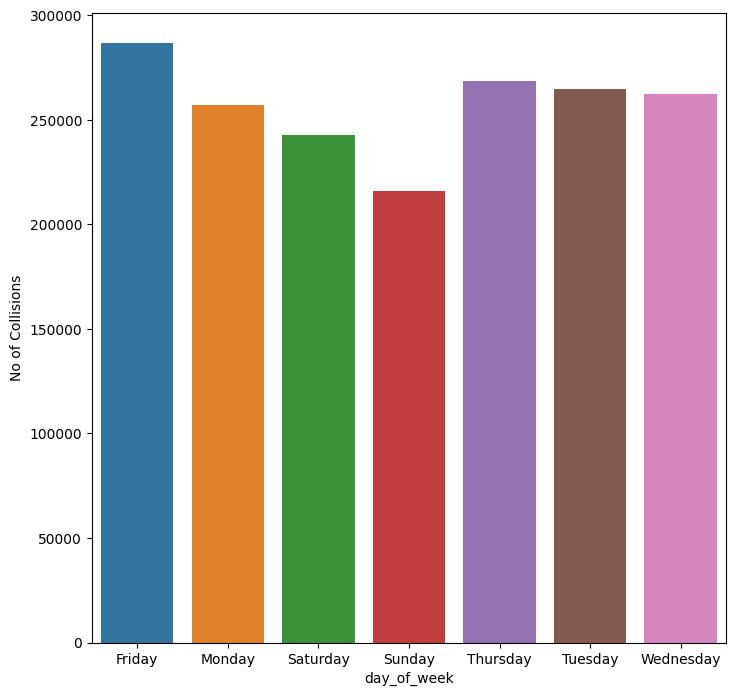

In [ ]:
plt.figure(figsize=(18,18))
ax1=plt.subplot2grid((2,2),(0,0))
sns.barplot(x='day_of_week',y='No of Collisions',data=day_wise)

## Number of collisions by borough

In [ ]:
borough_wise = data.groupby(['BOROUGH']).size().reset_index(name='No of Collisions')
borough_wise.head()

,BOROUGH,No of Collisions
0,BRONX,199530
1,BROOKLYN,868785
2,MANHATTAN,304433
3,QUEENS,366192
4,STATEN ISLAND,59304


<Axes: xlabel='BOROUGH', ylabel='No of Collisions'>

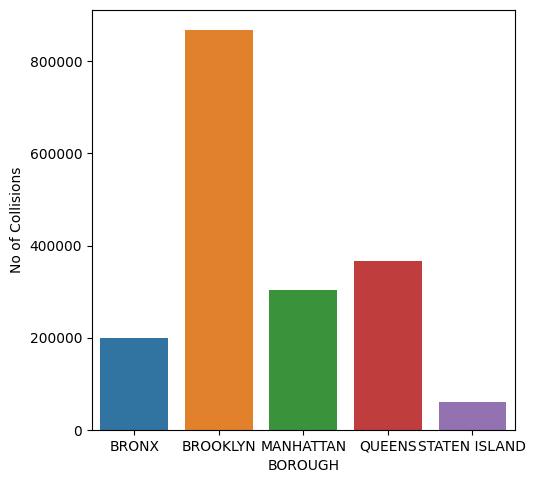

In [ ]:
plt.figure(figsize=(12,12))
ax1=plt.subplot2grid((2,2),(0,0))
sns.barplot(x='BOROUGH',y='No of Collisions',data=borough_wise)

# Data segregation - Group by year and hour

In [ ]:
data['DATE']=pd.to_datetime(data['CRASH DATETIME'])
data['Year']=data['DATE'].dt.year
data['Hour']=data['DATE'].dt.hour

YearlyData=data.groupby('Year').size().reset_index(name='No of Collisions')
hourly_collisions = data.groupby('Hour').size().reset_index(name='No of Collisions')

hourly_collisions.head()

,Hour,No of Collisions
0,0,58088
1,1,30986
2,2,23864
3,3,20938
4,4,23553


In [ ]:
YearlyData.head()

,Year,No of Collisions
0,2012,85458
1,2013,171734
2,2014,172363
3,2015,182298
4,2016,192004


# Number of collisions occuring yearly

<Axes: xlabel='Year', ylabel='No of Collisions'>

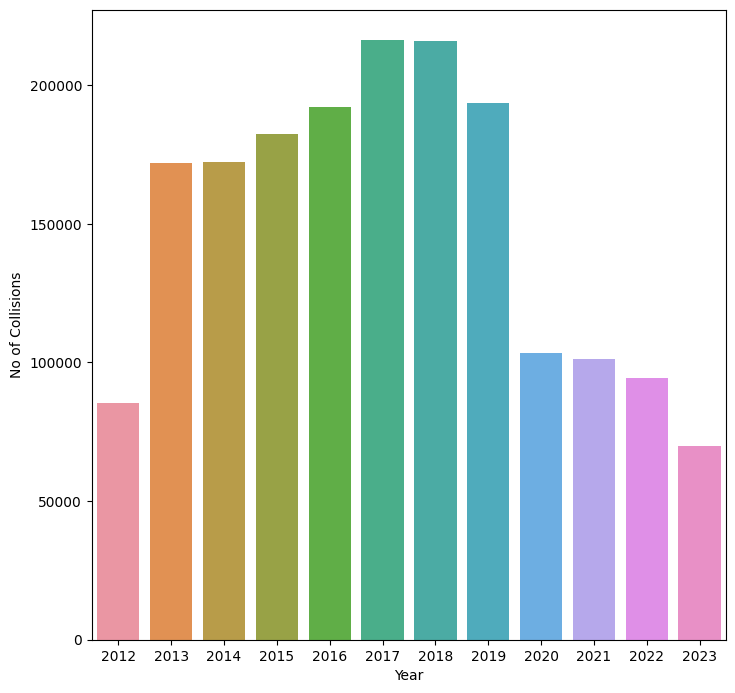

In [ ]:
plt.figure(figsize=(18,18))
ax1=plt.subplot2grid((2,2),(0,0))
sns.barplot(x='Year',y='No of Collisions',data=YearlyData)

# Number of collisions occuring during a particular hour

<Axes: xlabel='Hour', ylabel='No of Collisions'>

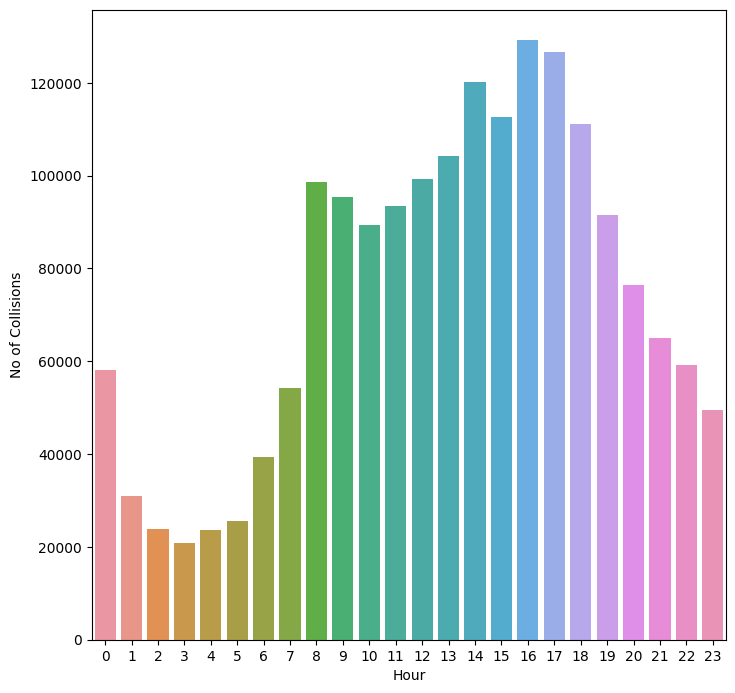

In [ ]:
plt.figure(figsize=(18,18))
ax1=plt.subplot2grid((2,2),(0,0))
sns.barplot(x='Hour',y='No of Collisions',data=hourly_collisions)

In [ ]:
df = pd.DataFrame(data)

# Saving the DataFrame to a CSV file
'''file_path = '/content/Motor_Vehicle_Collisions_-_Crashes_Modified.csv'
df.to_csv(file_path, index=False)'''

"file_path = '/content/Motor_Vehicle_Collisions_-_Crashes_Modified.csv'\ndf.to_csv(file_path, index=False)"

# Dataprep report

In [ ]:
pip install pdfkit

In [ ]:
report = create_report(df)

report.save('report.html')



/usr/local/lib/python3.10/dist-packages/dataprep/eda/distribution/render.py:274: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(pd.DataFrame({col: [nrows - npresent]}, index=["Others"]))
/usr/local/lib/python3.10/dist-packages/dataprep/eda/distribution/render.py:274: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(pd.DataFrame({col: [nrows - npresent]}, index=["Others"]))
/usr/local/lib/python3.10/dist-packages/dataprep/eda/distribution/render.py:274: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(pd.DataFrame({col: [nrows - npresent]}, index=["Others"]))
/usr/local/lib/python3.10/dist-packages/dataprep/eda/distribution/render.py:274: FutureWarning: The frame.append method is depreca

Report has been saved to report.html!


In [ ]:
report.show_browser()

In [ ]:
create_report(df)

# Accident hotspot Visualization

In [ ]:

# Assuming your original dataframe is named original_df
location_data = data.iloc[:, [1,2]]  # Selects the 2nd and 3rd columns (index 1 and 2)

print(location_data['LATITUDE'].dtypes)
print(location_data['LONGITUDE'].dtypes)

location_data.head()

float64
float64


,LATITUDE,LONGITUDE
3,40.667202,-73.866500
6,40.709183,-73.956825
7,40.868160,-73.831480
8,40.671720,-73.897100
9,40.751440,-73.973970


In [ ]:
location_data = location_data.applymap(float)
print(location_data['LATITUDE'].dtypes)
print(location_data['LONGITUDE'].dtypes)

location_data.head()

float64
float64


,LATITUDE,LONGITUDE
3,40.667202,-73.866500
6,40.709183,-73.956825
7,40.868160,-73.831480
8,40.671720,-73.897100
9,40.751440,-73.973970


In [ ]:
sampled_data = location_data.head(1000)

# Display the first few rows of the sampled data
print(sampled_data)

       LATITUDE  LONGITUDE
3     40.667202 -73.866500
6     40.709183 -73.956825
7     40.868160 -73.831480
8     40.671720 -73.897100
9     40.751440 -73.973970
...         ...        ...
1075  40.648840 -73.951020
1076  40.641240 -73.943726
1077  40.810486 -73.905075
1078  40.636612 -73.977080
1079  40.729560 -73.871450

[1000 rows x 2 columns]


In [ ]:
# Create a map centered around New York
map_ny = folium.Map(location=[40.7128, -74.0060], zoom_start=12)

# Add points to the map
for idx, row in sampled_data.iterrows():
    folium.Marker([row['LATITUDE'], row['LONGITUDE']]).add_to(map_ny)

# Display the map
map_ny

In [ ]:
from folium.plugins import HeatMap

nyc_map = folium.Map(location=[40.7128, -74.0060], zoom_start=12)

heat_data = [[row['LATITUDE'], row['LONGITUDE']] for index, row in sampled_data.iterrows()]
HeatMap(heat_data).add_to(nyc_map)

nyc_map

# No of Collisions grouped by Contributing factor vehicle

In [ ]:
ContributingFactor=data.groupby('CONTRIBUTING FACTOR VEHICLE 1').size().reset_index(name='No of Collisions')
ContributingFactor_sorted = ContributingFactor.sort_values(by='No of Collisions', ascending=False)
ContributingFactor.head()

,CONTRIBUTING FACTOR VEHICLE 1,No of Collisions
0,1,5
1,80,62
2,Accelerator Defective,943
3,Aggressive Driving/Road Rage,8487
4,Alcohol Involvement,19722


[Text(0, 0, 'Unspecified'),
 Text(1, 0, 'Driver Inattention/Distraction'),
 Text(2, 0, 'Failure to Yield Right-of-Way'),
 Text(3, 0, 'Following Too Closely'),
 Text(4, 0, 'Backing Unsafely'),
 Text(5, 0, 'Other Vehicular'),
 Text(6, 0, 'Passing or Lane Usage Improper'),
 Text(7, 0, 'Passing Too Closely'),
 Text(8, 0, 'Turning Improperly'),
 Text(9, 0, 'Fatigued/Drowsy')]

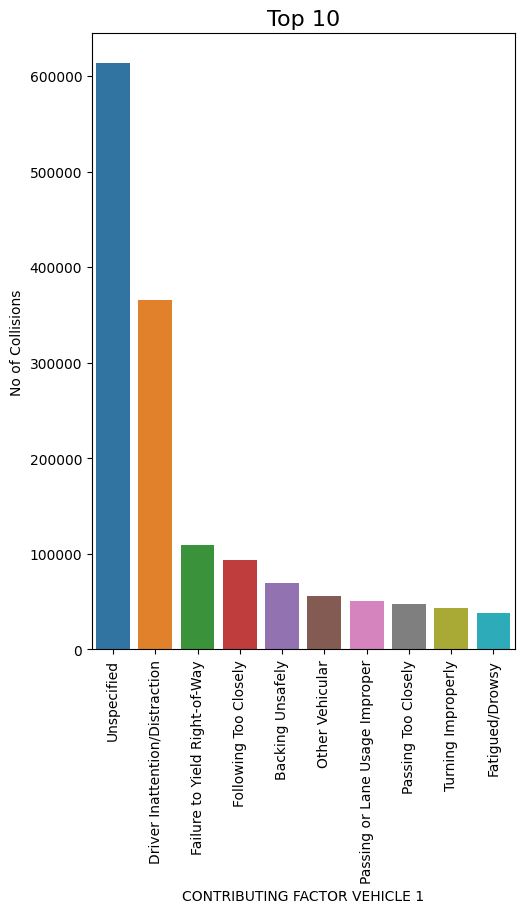

In [ ]:
plt.figure(figsize=(12,8))
ax1 =  plt.subplot2grid((1,2),(0,0))
ax1.set_title('Top 10', size=16)
sns.barplot(x='CONTRIBUTING FACTOR VEHICLE 1',y='No of Collisions',data=ContributingFactor_sorted.head(10))
ax1.set_xticklabels(ax1.xaxis.get_ticklabels(), rotation=90)

[Text(0, 0, 'Using On Board Navigation Device'),
 Text(1, 0, 'Headlights Defective'),
 Text(2, 0, 'Eating or Drinking'),
 Text(3, 0, 'Shoulders Defective/Improper'),
 Text(4, 0, 'Windshield Inadequate'),
 Text(5, 0, 'Cell Phone (hand-held)'),
 Text(6, 0, '80'),
 Text(7, 0, 'Texting'),
 Text(8, 0, 'Listening/Using Headphones'),
 Text(9, 0, '1')]

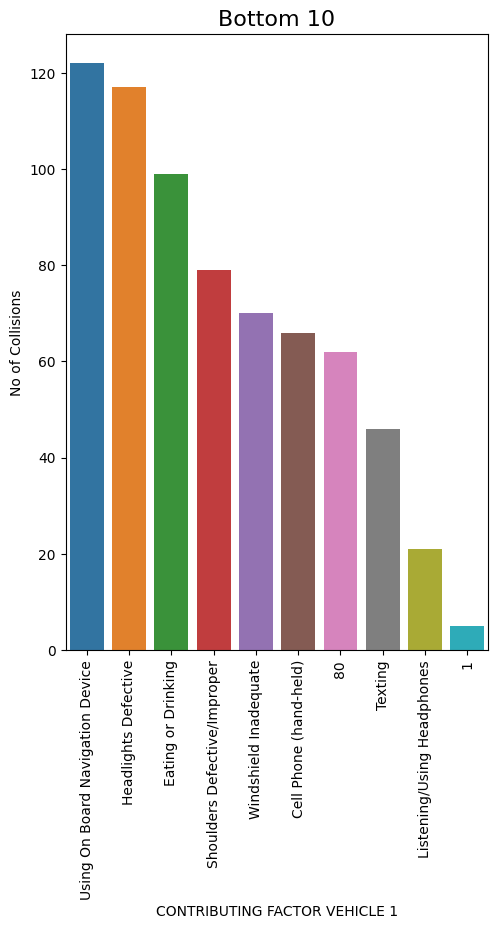

In [ ]:
plt.figure(figsize=(12,8))
ax1 =  plt.subplot2grid((1,2),(0,0))
ax1.set_title('Bottom 10', size=16)
sns.barplot(x='CONTRIBUTING FACTOR VEHICLE 1',y='No of Collisions',data=ContributingFactor_sorted.tail(10))
ax1.set_xticklabels(ax1.xaxis.get_ticklabels(), rotation=90)

# Number of collisions grouped by vehicle type code

[Text(0, 0, 'MARK'),
 Text(1, 0, 'MARKED RMP'),
 Text(2, 0, 'MARKED VAN'),
 Text(3, 0, 'MAXIM'),
 Text(4, 0, 'MCY B'),
 Text(5, 0, 'ME/BE'),
 Text(6, 0, 'MECHANICAL'),
 Text(7, 0, 'METRO TRAN'),
 Text(8, 0, 'MILITARY'),
 Text(9, 0, '�MBU')]

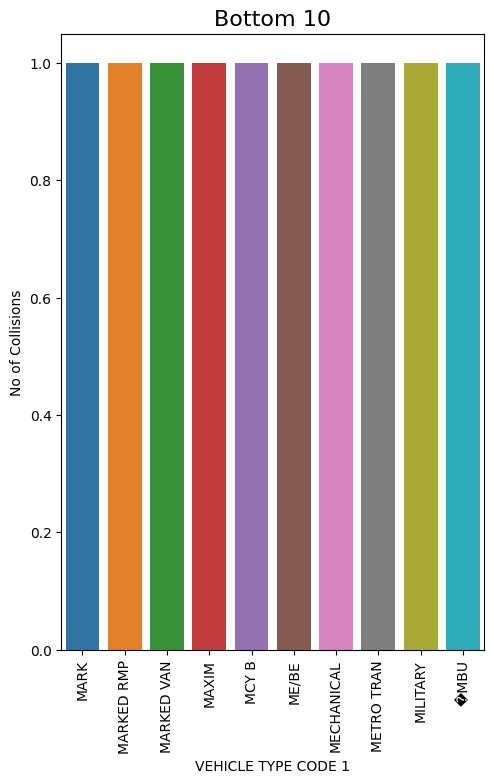

In [ ]:
vehicle_type=data.groupby('VEHICLE TYPE CODE 1').size().reset_index(name='No of Collisions')
vehicle_type_sorted = vehicle_type.sort_values(by='No of Collisions', ascending=False)

plt.figure(figsize=(12,8))
ax1 =  plt.subplot2grid((1,2),(0,0))
ax1.set_title('Bottom 10', size=16)
sns.barplot(x='VEHICLE TYPE CODE 1',y='No of Collisions',data=vehicle_type_sorted.tail(10))
ax1.set_xticklabels(ax1.xaxis.get_ticklabels(), rotation=90)


[Text(0, 0, 'Sedan'),
 Text(1, 0, 'Station Wagon/Sport Utility Vehicle'),
 Text(2, 0, 'PASSENGER VEHICLE'),
 Text(3, 0, 'SPORT UTILITY / STATION WAGON'),
 Text(4, 0, 'Taxi'),
 Text(5, 0, 'Pick-up Truck'),
 Text(6, 0, 'TAXI'),
 Text(7, 0, '4 dr sedan'),
 Text(8, 0, 'VAN'),
 Text(9, 0, 'Box Truck')]

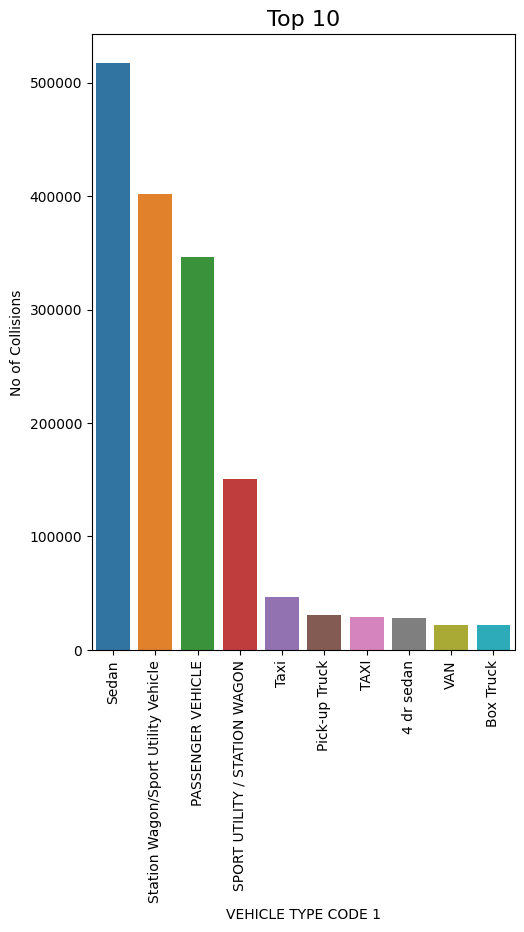

In [ ]:
plt.figure(figsize=(12,8))
ax1 =  plt.subplot2grid((1,2),(0,0))
ax1.set_title('Top 10', size=16)
sns.barplot(x='VEHICLE TYPE CODE 1',y='No of Collisions',data=vehicle_type_sorted.head(10))
ax1.set_xticklabels(ax1.xaxis.get_ticklabels(), rotation=90)

# Inferential Statistics



# Maximum Likelihood Estimation

We use MLE to estimate number of collisions occuring on any day.

In [ ]:
data.head()

,BOROUGH,LATITUDE,LONGITUDE,CONTRIBUTING FACTOR VEHICLE 1,CONTRIBUTING FACTOR VEHICLE 2,VEHICLE TYPE CODE 1,VEHICLE TYPE CODE 2,Total number of people injured,Total number of people killed,CRASH DATETIME,day_of_week,DATE,Year,Hour
3,BROOKLYN,40.667202,-73.866500,Unspecified,null,Sedan,null,0.0,0.0,2021-09-11 09:35:00,Saturday,2021-09-11 09:35:00,2021,9
6,BROOKLYN,40.709183,-73.956825,Passing Too Closely,Unspecified,Sedan,Tractor Truck Diesel,0.0,0.0,2021-12-14 17:05:00,Tuesday,2021-12-14 17:05:00,2021,17
7,BRONX,40.868160,-73.831480,Unspecified,Unspecified,Sedan,Sedan,4.0,0.0,2021-12-14 08:17:00,Tuesday,2021-12-14 08:17:00,2021,8
8,BROOKLYN,40.671720,-73.897100,Driver Inexperience,Unspecified,Sedan,null,0.0,0.0,2021-12-14 21:10:00,Tuesday,2021-12-14 21:10:00,2021,21
9,MANHATTAN,40.751440,-73.973970,Passing Too Closely,Unspecified,Sedan,Station Wagon/Sport Utility Vehicle,0.0,0.0,2021-12-14 14:58:00,Tuesday,2021-12-14 14:58:00,2021,14


In [ ]:
data['date']=data['CRASH DATETIME'].dt.date
date_wise = data.groupby(['date']).size().reset_index(name='No of Collisions')
date_wise.head()

,date,No of Collisions
0,2012-07-01,453
1,2012-07-02,477
2,2012-07-03,583
3,2012-07-04,361
4,2012-07-05,503


In [ ]:
from scipy.stats import poisson, kstest, norm, gennorm
# Calculate the mean (lambda) of the 'No of Collisions' for the Poisson distribution
lambda_est = date_wise['No of Collisions'].mean()

# Perform the Kolmogorov-Smirnov test
# ks_statistic, p_value = kstest(date_wise['No of Collisions'], poisson(lambda_est).cdf)
ks_statistic, p_value = kstest(date_wise['No of Collisions'], gennorm(500).cdf)

# Output the results
print(f"KS Statistic: {ks_statistic}, P-value: {p_value}")
if p_value > 0.05:
    print('Data follows normal distribution (fail to reject H0 at 5% significance level)')
else:
    print('Data does not follow normal distribution (reject H0 at 5% significance level)')


KS Statistic: 1.0, P-value: 0.0
Data does not follow normal distribution (reject H0 at 5% significance level)


In [ ]:
pip install fitter

  Using cached matplotlib-3.8.2-cp310-cp310-manylinux_2_17_x86_64.manylinux2014_x86_64.whl (11.6 MB)
  Using cached pandas-2.1.4-cp310-cp310-manylinux_2_17_x86_64.manylinux2014_x86_64.whl (12.3 MB)
  Attempting uninstall: pandas
    Found existing installation: pandas 1.5.3
    Uninstalling pandas-1.5.3:
      Successfully uninstalled pandas-1.5.3
  Attempting uninstall: matplotlib
    Found existing installation: matplotlib 3.5.3
    Uninstalling matplotlib-3.5.3:
      Successfully uninstalled matplotlib-3.5.3
ERROR: pip's dependency resolver does not currently take into account all the packages that are installed. This behaviour is the source of the following dependency conflicts.
lida 0.0.10 requires fastapi, which is not installed.
lida 0.0.10 requires kaleido, which is not installed.
lida 0.0.10 requires python-multipart, which is not installed.
lida 0.0.10 requires uvicorn, which is not installed.
autoviz 0.1.734 requires matplotlib<3.6,>=3.3.3, but you have matplotlib 3.8.2 whi

In [ ]:
date_wise.to_csv('datewise collisions.csv', index = False)

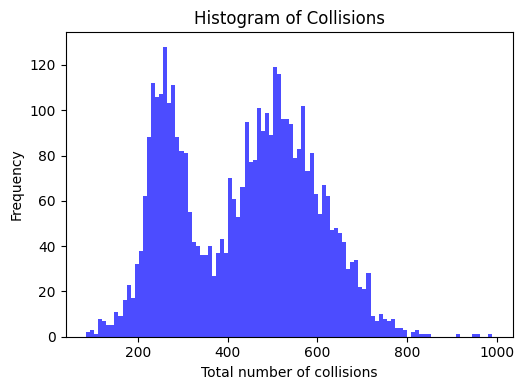

In [ ]:
# Plot histograms
plt.figure(figsize=(10, 4))

# Histogram for the 'Total number of people injured'
plt.subplot(1, 2, 1)
plt.hist(date_wise['No of Collisions'], bins=100, color='blue', alpha=0.7)
plt.title('Histogram of Collisions')
plt.xlabel('Total number of collisions')
plt.ylabel('Frequency')

# Show the plot
plt.tight_layout()
plt.show()

/usr/local/lib/python3.10/dist-packages/scipy/integrate/_quadpack_py.py:1233: IntegrationWarning: The maximum number of subdivisions (50) has been achieved.
  If increasing the limit yields no improvement it is advised to analyze 
  the integrand in order to determine the difficulties.  If the position of a 
  local difficulty can be determined (singularity, discontinuity) one will 
  probably gain from splitting up the interval and calling the integrator 
  on the subranges.  Perhaps a special-purpose integrator should be used.
  quad_r = quad(f, low, high, args=args, full_output=self.full_output,
/usr/local/lib/python3.10/dist-packages/scipy/integrate/_quadpack_py.py:1233: IntegrationWarning: The integral is probably divergent, or slowly convergent.
  quad_r = quad(f, low, high, args=args, full_output=self.full_output,


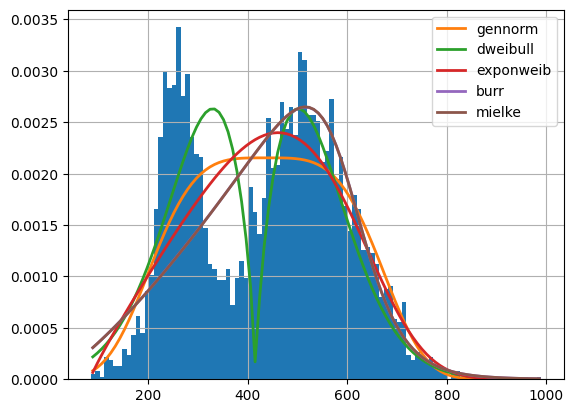

In [ ]:
from fitter import Fitter

f = Fitter(date_wise['No of Collisions'], timeout=500)

# Fit all distributions to the data
f.fit()

# Get the summary of the best fitting distribution
best_fit_summary = f.summary()

In [ ]:
collision_counts = date_wise['No of Collisions']

# Log-Likelihood Function
def neg_log_likelihood(params):
    mu = params[0]
    likelihoods = poisson.logpmf(collision_counts, mu)
    return -np.sum(likelihoods)

# Initial guess
initial_guess = [np.mean(collision_counts)]

# Minimize the negative log-likelihood
result = minimize(neg_log_likelihood, initial_guess, method='L-BFGS-B', bounds=[(0, None)])

# MLE for mu
mle_mu = result.x[0]
print("MLE estimate for mu:", mle_mu)

MLE estimate for mu: 435.8322795709316


using Maximum Likelihood Estimation (MLE) suggests an average of approximately 436 vehicle collisions per day. This estimation is based on the assumption that collision occurrences follow a Poisson distribution. The data analyzed included various variables such as location, contributing factors, vehicle types, and the number of people injured or killed. While many contributing factors were unspecified, indicating a potential area for improvement in data collection, the MLE provides valuable insight into collision frequencies. These results are significant for emergency services, urban planning, and policy-making, emphasizing the need for targeted safety measures and resource allocation to manage and reduce vehicle collisions effectively.

In [ ]:
injury_data = data.groupby('date').sum('Total number of people injured')

injury_data.drop(columns = ['LATITUDE','LONGITUDE','Total number of people killed', 'Year', 'Hour'],inplace = True)

injury_data.head()

,Total number of people injured
date,
2012-07-01,292.0
2012-07-02,286.0
2012-07-03,372.0
2012-07-04,256.0
2012-07-05,238.0


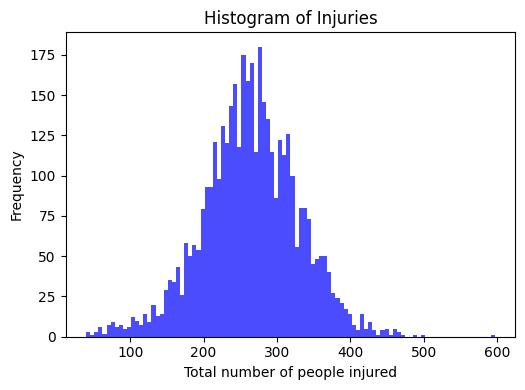

In [ ]:
# Plot histograms
plt.figure(figsize=(10, 4))

# Histogram for the 'Total number of people injured'
plt.subplot(1, 2, 1)
plt.hist(injury_data['Total number of people injured'], bins=100, color='blue', alpha=0.7)
plt.title('Histogram of Injuries')
plt.xlabel('Total number of people injured')
plt.ylabel('Frequency')

'''# Histogram for the 'Total number of people killed'
plt.subplot(1, 2, 2)
plt.hist(injury_data['Total number of people killed'], bins=50, color='red', alpha=0.7)
plt.title('Histogram of Fatalities')
plt.xlabel('Total number of people killed')
plt.ylabel('Frequency')'''

# Show the plot
plt.tight_layout()
plt.show()

Based on the provided histogram, the distribution of the number of people injured per day from motor vehicle collisions displays a peaked distribution with a long right tail, indicating a skewness to the right. This suggests that while most days have a number of injuries around the mode, there are days with a significantly higher number of injuries. Here are some points that could be added to the previous paragraphs considering this histogram:

Skewed Distribution: The histogram reveals that the data is not perfectly normally distributed as it shows a right-skewness. This implies that there are more days with fewer injuries and fewer days with a large number of injuries. The Bayesian approach and MLE applied previously assumed a normal distribution; however, given the actual distribution shape, models that account for skewness might be more appropriate for future analyses.

Tail Events Analysis: The presence of a long tail in the distribution suggests that extreme values — days with a very high number of injuries — are not negligible and should be considered in the planning of healthcare and emergency services. These could be days with specific events or conditions that increase the likelihood of collisions, such as inclement weather, holidays, or large city events.

Robustness to Outliers: The Bayesian method's robustness in the face of data that may contain outliers or be non-normally distributed can be highlighted. The posterior mean is influenced by the prior, which can help to mitigate the effect of extreme values in the observed data. However, the right-skewness of the data suggests that future Bayesian analysis could benefit from a prior that better reflects the likelihood of tail events, or by using a different likelihood function more suited to the actual distribution of the data.

In [ ]:
from scipy.stats import norm
from scipy.optimize import minimize
import numpy as np

injury_count = injury_data['Total number of people injured']
# Negative log-likelihood function for a normal distribution
def neg_log_likelihood(params):
    mu, sigma = params
    likelihoods = norm.logpdf(injury_count, mu, sigma)
    return -np.sum(likelihoods)

# Initial guess for mu and sigma
initial_guess = [np.mean(injury_count), np.std(injury_count)]

# Minimize the negative log-likelihood
result = minimize(neg_log_likelihood, initial_guess, method='L-BFGS-B', bounds=[(None, None), (0, None)])

# MLE for mu and sigma
mle_mu, mle_sigma = result.x
print("MLE estimate for mu:", mle_mu)
print("MLE estimate for sigma:", mle_sigma)

MLE estimate for mu: 264.12845370819196
MLE estimate for sigma: 65.44671419793006


Maximum Likelihood Estimation (MLE) has been used to estimate the parameters of a normal distribution fitting the data on the number of people injured per day from motor vehicle collisions since 2012. The negative log-likelihood function for a normal distribution has been defined and minimized using the minimize function from SciPy's optimize module, with an initial guess for the parameters
�
μ (mean) and
�
σ (standard deviation) based on the sample's mean and standard deviation.

The MLE has yielded an estimated mean (
�
μ) of approximately 264.12 injuries per day, suggesting that on average, there are over two hundred injuries per day due to motor vehicle collisions. Additionally, the estimated standard deviation (
�
σ) is about 65.45, which measures the variation or dispersion of the daily injury count around the mean. This relatively high standard deviation indicates a significant daily fluctuation in the number of injuries.

This analysis provides valuable insights into the regularity and variance of injuries from traffic incidents, which can be pivotal for healthcare providers and city planners to allocate resources efficiently, implement targeted safety measures, and evaluate the effectiveness of traffic laws and safety interventions over time.








# Bayesian approach to parameter estimation

In [ ]:
injury_data.to_csv('injury_datewise.csv', index = False)

In [ ]:
# Prior hyperparameters for the Gamma distribution
# Shape parameter (alpha)
alpha_prior = 1  # You might choose a different value based on prior knowledge
# Rate parameter (beta)
beta_prior = 1   # You might choose a different value based on prior knowledge


# Ensure you sum over the 'Total number of people injured' column to get a scalar value
total_injuries = injury_data['Total number of people injured'].sum()
days_count = len(injury_data)

# Updating hyperparameters based on the data
alpha_posterior = alpha_prior + total_injuries
beta_posterior = beta_prior + days_count


In [ ]:
# Posterior mean and variance
posterior_mean = alpha_posterior / beta_posterior
posterior_variance = alpha_posterior / (beta_posterior ** 2)

# Posterior mode
# Note: The mode is only defined for alpha > 1
if alpha_posterior > 1:
    posterior_mode = (alpha_posterior - 1) / beta_posterior
else:
    posterior_mode = "undefined for alpha <= 1"

print(f"Posterior mean of injuries per day: {posterior_mean}")
print(f"Posterior variance of injuries per day: {posterior_variance}")
print(f"Posterior mode of injuries per day: {posterior_mode}")

Posterior mean of injuries per day: 264.06469590501575
Posterior variance of injuries per day: 0.06398466098982693
Posterior mode of injuries per day: 264.0644535982554


The Bayesian analysis suggests that, on average, there are around 264 injuries per day due to vehicle collisions. The posterior variance is very small, indicating that the data provides a strong indication of the true average number of injuries, thus giving us confidence in this estimate.

However, it is important to consider that these estimates are based on the assumption that the data follows a Poisson process and that the prior beliefs are accurately reflected by a Gamma distribution with the chosen hyperparameters.

The close alignment of the posterior mean and mode suggests that the data is highly informative and that the prior has likely been swamped by the data due to the large amount of data points. This is often the case with large datasets where the influence of the prior becomes negligible if it is relatively non-informative.

This Bayesian estimate can be used by health services and traffic safety authorities to understand the extent of injuries from vehicle collisions and to allocate resources accordingly. It also provides a basis for further investigation into what might be causing these injuries and how to prevent them. The estimate can further guide the planning of emergency services and hospital resource allocation.

In [ ]:
import numpy as np
from scipy.stats import norm

# Assume we have a prior belief that the mean number of injuries is normally distributed.
# We need to set the prior mean (mu_0) and variance (tau^2).
mu_0 = 250  # This is an example, adjust based on your prior belief
tau_2 = 25  # This is an example, adjust based on your prior belief

# Calculate the sample mean and sample variance from the data
sample_mean = np.mean(injury_data)
sample_variance = np.var(injury_data)
n = len(injury_data)

# Calculate posterior mean and variance
posterior_mean = (mu_0 / tau_2 + sample_mean * n / sample_variance) / (1 / tau_2 + n / sample_variance)
posterior_variance = 1 / (1 / tau_2 + n / sample_variance)

# For a normal distribution, the mean, median, and mode are all the same
posterior_median = posterior_mean
posterior_mode = posterior_mean  # In a normal distribution, mode = mean

# Standard deviation is the square root of the variance
posterior_std_dev = np.sqrt(posterior_variance)

# Printing the results
posterior_mean, posterior_median, posterior_mode, posterior_variance, posterior_std_dev

/usr/local/lib/python3.10/dist-packages/numpy/core/fromnumeric.py:3430: FutureWarning: In a future version, DataFrame.mean(axis=None) will return a scalar mean over the entire DataFrame. To retain the old behavior, use 'frame.mean(axis=0)' or just 'frame.mean()'
  return mean(axis=axis, dtype=dtype, out=out, **kwargs)


(Total number of people injured    263.565164
 dtype: float64,
 Total number of people injured    263.565164
 dtype: float64,
 Total number of people injured    263.565164
 dtype: float64,
 Total number of people injured    0.996729
 dtype: float64,
 Total number of people injured    0.998363
 dtype: float64)

The Bayesian approach to parameter estimation has been applied to data on the number of people injured per day in motor vehicle collisions since 2012. With the assumption of normally distributed injuries, a prior mean (μ₀) of 250 and prior variance (τ²) of 25 have been established based on prior beliefs. Using the observed data, the sample mean and variance were calculated to be approximately 263.56 and 0.99, respectively.

Incorporating the prior belief with the evidence from the data, the posterior mean was also estimated at approximately 263.56. Since the posterior distribution is normal, the posterior mean, median, and mode are all equivalent, indicating a central tendency for the daily injury count. The posterior standard deviation, a measure of dispersion around this central value, is approximately 0.99. This low standard deviation suggests a high degree of certainty about the mean estimate, implying that the daily number of injuries is fairly consistent over time.

The analysis represents a synthesis of historical knowledge and new data, providing a probabilistically-informed estimate of the average number of injuries per day. This information could be instrumental in guiding healthcare preparedness, emergency response planning, and policy-making aimed at reducing the incidence and impact of traffic-related injuries.

# ANOVA

In [ ]:
anova_data = data.rename(columns={'Total number of people injured': 'Total_number_of_people_injured', 'BOROUGH': 'BOROUGH'})

In [ ]:
anova_data.head()

,BOROUGH,LATITUDE,LONGITUDE,CONTRIBUTING FACTOR VEHICLE 1,CONTRIBUTING FACTOR VEHICLE 2,VEHICLE TYPE CODE 1,VEHICLE TYPE CODE 2,Total_number_of_people_injured,Total number of people killed,CRASH DATETIME,day_of_week,DATE,Year,Hour,date
3,BROOKLYN,40.667202,-73.866500,Unspecified,null,Sedan,null,0.0,0.0,2021-09-11 09:35:00,Saturday,2021-09-11 09:35:00,2021,9,2021-09-11
6,BROOKLYN,40.709183,-73.956825,Passing Too Closely,Unspecified,Sedan,Tractor Truck Diesel,0.0,0.0,2021-12-14 17:05:00,Tuesday,2021-12-14 17:05:00,2021,17,2021-12-14
7,BRONX,40.868160,-73.831480,Unspecified,Unspecified,Sedan,Sedan,4.0,0.0,2021-12-14 08:17:00,Tuesday,2021-12-14 08:17:00,2021,8,2021-12-14
8,BROOKLYN,40.671720,-73.897100,Driver Inexperience,Unspecified,Sedan,null,0.0,0.0,2021-12-14 21:10:00,Tuesday,2021-12-14 21:10:00,2021,21,2021-12-14
9,MANHATTAN,40.751440,-73.973970,Passing Too Closely,Unspecified,Sedan,Station Wagon/Sport Utility Vehicle,0.0,0.0,2021-12-14 14:58:00,Tuesday,2021-12-14 14:58:00,2021,14,2021-12-14


In [ ]:
import pandas as pd
from statsmodels.formula.api import ols
from statsmodels.stats.anova import anova_lm


# Fit the ANOVA model
# Assuming 'number_of_collisions' is a continuous variable and 'borough' is the categorical group
model = ols('Total_number_of_people_injured ~ C(BOROUGH)', data=anova_data).fit()

# Perform ANOVA
anova_results = anova_lm(model, typ=2)

print(anova_results)

                  sum_sq         df            F  PR(>F)
C(BOROUGH)  1.692555e+04        4.0  2227.766965     0.0
Residual    3.415548e+06  1798239.0          NaN     NaN


Null hypothesis : Total number of people injured across boroughs is same.

Based on the ANOVA analysis of the 'Total number of people injured' across different 'BOROUGH's, the results are significant at a conventional alpha level of 0.05. With an F-statistic of approximately 2227.77 and a P-value of 0.0, we have strong evidence to reject the null hypothesis that the mean number of people injured is the same across all boroughs.

The large F-statistic indicates that the boroughs differ more between each other than they do within themselves regarding the number of injuries. The sum of squares for the boroughs versus the residual sum of squares further supports this, showing a substantial portion of the variance in injuries is associated with the boroughs.

These results suggest that the location of the incident (i.e., the borough) has a significant association with the number of injuries that occur. Therefore, borough is a factor that should be considered carefully in any policies, interventions, or further analyses concerning vehicle collisions and their impact on human health.

As an important next step, post hoc tests (e.g., Tukey's HSD) could be performed to determine which boroughs' means are significantly different from others. Additionally, it would be prudent to assess the assumptions of ANOVA, including the normality of residuals and homogeneity of variance, to confirm the validity of these results.

Given the practical significance in such a context, it would also be worth exploring the reasons behind the differences between boroughs, which could include factors such as traffic volume, urban planning, or the prevalence of safety measures. This insight could guide targeted strategies to reduce the number of injuries in areas with higher rates.

Statistical Significance: The ANOVA test yielded an F-statistic of 2227.77 and a P-value close to 0.0, leading us to reject the null hypothesis. This means there are statistically significant differences in the number of people injured in vehicle collisions across different boroughs.

Implications for Safety Interventions: The significant variation in injuries by borough suggests that interventions should be tailored to each borough’s unique traffic conditions and urban environment. This could involve targeted safety campaigns, infrastructure improvements, or enforcement changes.

Need for Further Investigation: While the ANOVA test indicates differences, it does not specify which boroughs are different or why. Additional post hoc analyses are necessary to pinpoint specific contrasts and understand the underlying factors contributing to the injury rates.

Policy and Planning Considerations: The findings underscore the importance of location-specific data in informing policy decisions and health resource planning. Borough-specific strategies may be more effective in addressing and mitigating the factors that lead to higher injury rates.

Based on the code snippet and ANOVA results provided, let's break down the analysis:

Variables for the model:

Dependent Variable (Response Variable): 'Total_number_of_people_injured' - This is the continuous variable representing the count of people injured in motor vehicle collisions.
Independent Variable (Factor): 'BOROUGH' - This is the categorical group variable representing different boroughs in New York City.
Evaluating the Model:

The ANOVA results show an F-statistic of approximately 2227.77, which is significantly high, and a P-value of 0.0. This indicates a statistically significant difference in the means of the 'Total_number_of_people_injured' across the different levels of the 'BOROUGH' variable.
The sum_sq (sum of squares) for the boroughs is high compared to the residual sum of squares, which supports the high F-statistic and suggests that the boroughs have a strong association with the number of people injured.
Is it a good model?

As an ANOVA model, it is effective for testing if there are any statistically significant differences between the means of the different boroughs. The significant F-statistic and P-value indicate that it is a good model for this specific hypothesis test.
However, ANOVA does not tell us about the predictive\ power of the model. It only tells us that at least one borough mean is significantly different from the others.
Can we use it to predict?

ANOVA is not typically used for prediction. It is used for hypothesis testing to understand the relationship between a categorical factor and a continuous outcome.
For prediction, you would typically use regression analysis. While the 'ols' function from statsmodels used here stands for "ordinary least squares," a regression method, the ANOVA test does not provide us with the regression equation needed for prediction.
To predict the number of people injured based on the borough, you would need to use the coefficients from the fitted OLS regression model (not shown in the screenshot), assuming that the model's assumptions are met and it has a good fit.
Before using the model for prediction, you should check the regression diagnostics to ensure that the assumptions of linear regression are met, including linearity, independence, homoscedasticity, and normality of residuals. If these assumptions hold, and the model explains a sufficient amount of variance in the data (as indicated by R-squared and other metrics), then it may be used for prediction within the scope of the observed data.


The application of ANOVA to the New York City motor vehicle collision dataset reveals significant differences in the 'Total number of people injured' across various 'BOROUGH's. The test statistics, an F-statistic of approximately 2227.77 and a P-value effectively at zero, provide robust evidence to reject the null hypothesis that the average number of injuries is consistent across boroughs. This suggests a strong variation in injury counts by location, with the sum of squares indicating a considerable proportion of injury variance is attributable to differences among the boroughs.

The statistical significance of these differences underscores the influence of borough location on collision injury outcomes and signals the need for borough-specific safety measures and interventions. While the ANOVA test establishes that not all boroughs are the same with respect to the number of injuries, it does not indicate the predictive capacity of the model. Post hoc tests are recommended to further explore the pairwise differences between boroughs and to dissect the specific factors that contribute to the disparities in injury rates.

For predictive purposes, ANOVA serves as a preliminary step, confirming the relevance of the borough variable in the number of injuries. However, for precise predictions, a regression model with coefficients obtained from an 'ordinary least squares' (OLS) method would be more suitable. Such a model, contingent on fulfilling linear regression assumptions and demonstrating a satisfactory explanatory power (as indicated by metrics like R-squared), could potentially be employed for predicting injury counts based on specific borough characteristics. It is crucial, before any prediction is attempted, to validate the model against the assumptions of linearity, independence, homoscedasticity, and normality of residuals to ensure its reliability and accuracy.

As an important next step, post hoc tests (e.g., Tukey's HSD) could be performed to determine which boroughs' means are significantly different from others. Additionally, it would be prudent to assess the assumptions of ANOVA, including the normality of residuals and homogeneity of variance, to confirm the validity of these results.

Given the practical significance in such a context, it would also be worth exploring the reasons behind the differences between boroughs, which could include factors such as traffic volume, urban planning, or the prevalence of safety measures. This insight could guide targeted strategies to reduce the number of injuries in areas with higher rates.

# Tukey's HSD test

     Multiple Comparison of Means - Tukey HSD, FWER=0.05      
  group1      group2    meandiff p-adj   lower   upper  reject
--------------------------------------------------------------
    BRONX      BROOKLYN    0.044    0.0  0.0346  0.0533   True
    BRONX     MANHATTAN  -0.2264    0.0 -0.2372 -0.2156   True
    BRONX        QUEENS  -0.0501    0.0 -0.0605 -0.0396   True
    BRONX STATEN ISLAND  -0.0718    0.0 -0.0894 -0.0542   True
 BROOKLYN     MANHATTAN  -0.2704    0.0 -0.2783 -0.2624   True
 BROOKLYN        QUEENS   -0.094    0.0 -0.1014 -0.0866   True
 BROOKLYN STATEN ISLAND  -0.1157    0.0 -0.1317 -0.0998   True
MANHATTAN        QUEENS   0.1763    0.0  0.1671  0.1855   True
MANHATTAN STATEN ISLAND   0.1546    0.0  0.1378  0.1715   True
   QUEENS STATEN ISLAND  -0.0217 0.0035 -0.0383  -0.005   True
--------------------------------------------------------------
Figure(1000x600)


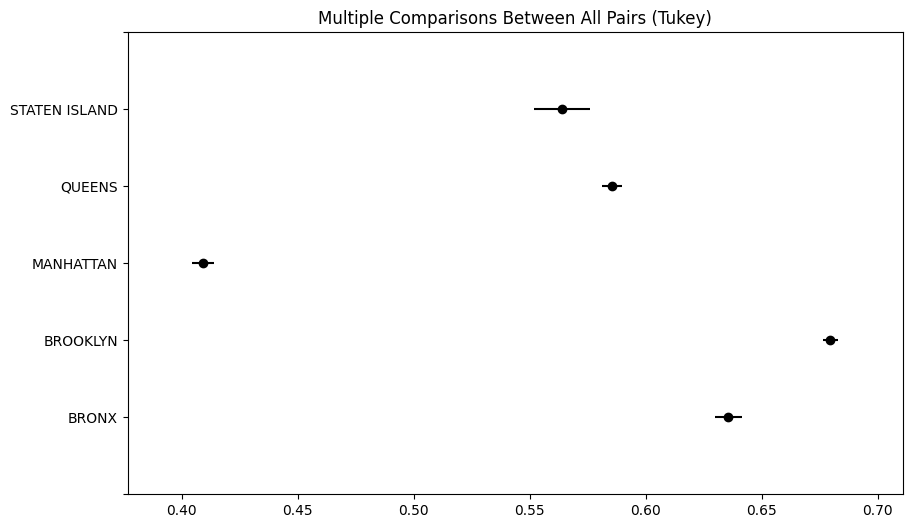

In [ ]:
from statsmodels.stats.multicomp import pairwise_tukeyhsd
# Perform Tukey's HSD test
tukey_results = pairwise_tukeyhsd(endog=anova_data['Total_number_of_people_injured'],  # Response variable
                                  groups=anova_data['BOROUGH'],  # Groups
                                  alpha=0.05)  # Significance level

# Print the results
print(tukey_results.summary())
# If you want to see all the group comparisons even if they are not significant
print(tukey_results.plot_simultaneous())

The Tukey HSD test results strongly suggest that the number of injuries sustained in motor vehicle collisions is not uniform across boroughs. Each borough differs significantly from the others in terms of the mean number of people injured.

The practical implications of this analysis are substantial. It indicates that location-specific factors may influence the severity of collisions. These could include, but are not limited to, traffic volume, road conditions, urban design, population density, or even the efficacy of emergency response services.

For instance, the test reveals that collisions in the Bronx lead to a higher mean number of people injured compared to Brooklyn, which in turn is higher than Manhattan, and so on. Stakeholders in urban planning, traffic regulation, and public health would need to investigate the underlying causes of these disparities to target interventions effectively.

Given that the data includes over 1.7 million records, the statistical significance found here is likely to be accompanied by practical significance, warranting a thorough investigation into the municipal differences that could account for these findings. Efforts to improve road safety and reduce injuries could be tailored to the unique characteristics of each borough, potentially increasing their effectiveness.

The visual representation provided by the plot further illustrates the differences between boroughs, with non-overlapping confidence intervals emphasizing the disparities in injury outcomes. This visual evidence, alongside the statistical findings, can be a compelling tool for policymakers and public health officials advocating for targeted safety interventions.

# Chi square test

In [ ]:
len(data['CONTRIBUTING FACTOR VEHICLE 1'].unique())

61

In [ ]:
import pandas as pd
from scipy.stats import chi2_contingency

# Load your data
# data = pd.read_csv('path_to_your_data.csv')

# Create a contingency table
contingency_table = pd.crosstab(data['BOROUGH'], anova_data['CONTRIBUTING FACTOR VEHICLE 1'])

# Perform the Chi-square test
chi2, p, dof, expected = chi2_contingency(contingency_table)

print(f"Chi-Square Statistic: {chi2}")
print(f"p-value: {p}")
print(f"Degrees of Freedom: {dof}")
# If you want to see the expected frequencies table
print(f"Expected Frequencies: \n{expected}")


Chi-Square Statistic: 75325.13580309882
p-value: 0.0
Degrees of Freedom: 240
Expected Frequencies: 
[[5.54791230e-01 6.87941125e+00 1.04633626e+02 9.41702633e+02
  2.18831853e+03 1.47019676e+02 7.66310934e+03 6.52767361e+02
  5.17065426e+01 7.32324423e+00 2.49656053e+01 4.05670005e+04
  3.15265664e+03 1.28711565e+02 4.06107180e+01 8.72131813e+01
  1.09848663e+01 3.15343335e+02 1.21842140e+04 4.18423545e+03
  5.39922825e+02 1.03356497e+04 3.89241527e+02 1.29821148e+01
  1.61444248e+02 2.17256246e+02 9.04309704e+01 2.33012316e+00
  1.92712282e+03 3.99116811e+02 2.21028826e+02 1.83081106e+01
  6.22043023e+03 1.16528350e+03 1.22320370e+03 8.14322567e+02
  5.24910174e+03 5.62647073e+03 2.30460277e+02 1.83425076e+03
  9.54462832e+02 8.84448178e+02 1.44689553e+03 1.27158150e+02
  1.91513932e+03 8.76570143e+00 2.79281905e+02 5.10407931e+00
  1.61999039e+01 2.37228730e+02 2.07491920e+01 7.87803546e+01
  3.53868038e+03 4.83034532e+03 3.80409250e+03 2.74976725e+03
  6.81027316e+04 1.35369060e+01 

The Chi-square test of independence has revealed a statistically significant association between the boroughs in New York and the contributing factors to vehicle collisions. The exceptionally low p-value and high Chi-square statistic strongly suggest that the frequency and type of contributing factors vary significantly across different boroughs.

What this means practically is that the reasons behind vehicle collisions are not uniformly distributed across boroughs. Some contributing factors may be more prevalent in certain boroughs than in others. This could be due to a variety of region-specific factors such as differences in traffic patterns, road conditions, enforcement of traffic laws, or even socio-economic factors.

For instance, one borough may have a higher frequency of collisions due to 'Driver Inexperience', while another may see more collisions related to 'Passing Too Closely'. Understanding these associations can help in designing targeted interventions to improve road safety in each borough.

Given the vast number of data points and the diversity of contributing factors, this result can be a powerful tool for policymakers and city planners to address the unique challenges each borough faces regarding road safety. It can also guide further research to explore the underlying causes of these patterns and develop tailored solutions to reduce vehicle collisions and enhance public safety.

The Chi-square test of independence is performed to determine if there is a significant association between two categorical variables. In this case, based on the code snippet provided, the two variables are 'BOROUGH' and 'CONTRIBUTING FACTOR VEHICLE 1' from the New York City motor vehicle collisions dataset.

The null hypothesis (H0) for a Chi-square test of independence is always that there is no association between the variables—in other words, that the variables are independent of each other.

For this dataset, the null hypothesis specifically would be:

"There is no association between the boroughs in New York City and the contributing factors to vehicle collisions."

The alternative hypothesis (H1) would be:

"There is an association between the boroughs in New York City and the contributing factors to vehicle collisions."

The inferences from the given Chi-square test results are as follows:

1. With a Chi-square statistic of approximately 75325.13 and a p-value of 0.0, the results are highly significant. This allows us to reject the null hypothesis and conclude that there is a statistically significant association between the boroughs and the contributing factors to vehicle collisions.

2. The degrees of freedom (df) for the test is 240, likely reflecting a large number of categories within the two variables.

3. The expected frequencies output shows the number of incidents we would expect for each combination of borough and contributing factor if there were no association between the two.

The practical implication of this result is that certain contributing factors to vehicle collisions might be more prevalent in some boroughs than in others. This could be due to various factors specific to each borough such as differences in traffic patterns, road infrastructure, enforcement of traffic laws, or the driving environment. Policymakers and city planners can use these insights to develop targeted interventions to improve road safety tailored to the specific conditions of each borough.

In [ ]:
data.head()

,BOROUGH,LATITUDE,LONGITUDE,CONTRIBUTING FACTOR VEHICLE 1,CONTRIBUTING FACTOR VEHICLE 2,VEHICLE TYPE CODE 1,VEHICLE TYPE CODE 2,Total number of people injured,Total number of people killed,CRASH DATETIME,day_of_week,DATE,Year,Hour,date
3,BROOKLYN,40.667202,-73.866500,Unspecified,null,Sedan,null,0.0,0.0,2021-09-11 09:35:00,Saturday,2021-09-11 09:35:00,2021,9,2021-09-11
6,BROOKLYN,40.709183,-73.956825,Passing Too Closely,Unspecified,Sedan,Tractor Truck Diesel,0.0,0.0,2021-12-14 17:05:00,Tuesday,2021-12-14 17:05:00,2021,17,2021-12-14
7,BRONX,40.868160,-73.831480,Unspecified,Unspecified,Sedan,Sedan,4.0,0.0,2021-12-14 08:17:00,Tuesday,2021-12-14 08:17:00,2021,8,2021-12-14
8,BROOKLYN,40.671720,-73.897100,Driver Inexperience,Unspecified,Sedan,null,0.0,0.0,2021-12-14 21:10:00,Tuesday,2021-12-14 21:10:00,2021,21,2021-12-14
9,MANHATTAN,40.751440,-73.973970,Passing Too Closely,Unspecified,Sedan,Station Wagon/Sport Utility Vehicle,0.0,0.0,2021-12-14 14:58:00,Tuesday,2021-12-14 14:58:00,2021,14,2021-12-14


In [ ]:
data.to_csv('data_new.csv', index = False)

In [ ]:
data_regression = data.groupby(['BOROUGH','day_of_week','Hour','CONTRIBUTING FACTOR VEHICLE 1','VEHICLE TYPE CODE 1']).sum(['Total number of people injured'])
data_regression.head()

LATITUDE  \
BOROUGH day_of_week Hour CONTRIBUTING FACTOR VEHICLE 1 VEHICLE TYPE CODE 1                               
BRONX   Friday      0    Aggressive Driving/Road Rage  4 dr sedan                            40.851140   
                                                       PASSENGER VEHICLE                     81.734652   
                                                       SPORT UTILITY / STATION WAGON        122.553564   
                                                       Sedan                                122.481803   
                                                       Station Wagon/Sport Utility Vehicle  163.407925   

                                                                                             LONGITUDE  \
BOROUGH day_of_week Hour CONTRIBUTING FACTOR VEHICLE 1 VEHICLE TYPE CODE 1                               
BRONX   Friday      0    Aggressive Driving/Road Rage  4 dr sedan                           -73.788475   
                                                       PASSENGER VEHICLE                   -147.755753   
                                                       SPORT UTILITY / STATION WAGON       -221.667407   
                                                       Sedan                               -221.738979   
                                                       Station Wagon/Sport Utility Vehicle -295.546510   

                                                                                            Total number of people injured  \
BOROUGH day_of_week Hour CONTRIBUTING FACTOR VEHICLE 1 VEHICLE TYPE CODE 1                                                   
BRONX   Friday      0    Aggressive Driving/Road Rage  4 dr sedan                                                      0.0   
                                                       PASSENGER VEHICLE                                               0.0   
                                                       SPORT UTILITY / STATION WAGON                                   0.0   
                                                       Sedan                                                           4.0   
                                                       Station Wagon/Sport Utility Vehicle                            10.0   

                                                                                            Total number of people killed  \
BOROUGH day_of_week Hour CONTRIBUTING FACTOR VEHICLE 1 VEHICLE TYPE CODE 1                                                  
BRONX   Friday      0    Aggressive Driving/Road Rage  4 dr sedan                                                     0.0   
                                                       PASSENGER VEHICLE                                              0.0   
                                                       SPORT UTILITY / STATION WAGON                                  0.0   
                                                       Sedan                                                          0.0   
                                                       Station Wagon/Sport Utility Vehicle                            0.0   

                                                                                            Year  
BOROUGH day_of_week Hour CONTRIBUTING FACTOR VEHICLE 1 VEHICLE TYPE CODE 1                        
BRONX   Friday      0    Aggressive Driving/Road Rage  4 dr sedan                           2016  
                                                       PASSENGER VEHICLE                    4028  
                                                       SPORT UTILITY / STATION WAGON        6040  
                                                       Sedan                                6060  
                                                       Station Wagon/Sport Utility Vehicle  8077

In [ ]:
data_regression.shape

(212494, 5)

In [ ]:
DataLR = data[['BOROUGH','day_of_week','Hour','Total number of people injured']]
DataLR.head()

,BOROUGH,day_of_week,Hour,Total number of people injured
3,BROOKLYN,Saturday,9,0.0
6,BROOKLYN,Tuesday,17,0.0
7,BRONX,Tuesday,8,4.0
8,BROOKLYN,Tuesday,21,0.0
9,MANHATTAN,Tuesday,14,0.0


In [ ]:
# Perform one-hot encoding on categorical variables
df_encoded = pd.get_dummies(DataLR, columns=['BOROUGH', 'day_of_week'])

# Extracting features and target variable
X = df_encoded.drop('Total number of people injured', axis=1).values
y = df_encoded['Total number of people injured'].values

# Adding a column of ones to the features to represent the intercept term
X = np.concatenate([np.ones((X.shape[0], 1)), X], axis=1)

# Performing linear regression using the Normal Equation
# theta = (X^T * X)^(-1) * X^T * y
theta = np.linalg.inv(X.T @ X) @ X.T @ y

# The first coefficient is the intercept, the rest are the slopes
intercept = theta[0]
slopes = theta[1:]

# Output the intercept and slopes
print(f"Intercept: {intercept}")
print(f"Slopes: {slopes}")

Intercept: 0.8621273040771484
Slopes: [ 2.38588502e-03 -2.69657135e-01  7.17769623e-01 -5.51940918e-01
  1.33692741e-01 -1.94145912e+00  8.43631744e-01 -2.38866615e+00
  7.65262604e-01 -1.29016495e+00 -2.21030807e+00  5.06248474e-02
 -1.63324713e+00]


In [ ]:
borough_labels = {name: label for label, name in enumerate(df['BOROUGH'].unique())}
day_of_week_labels = {name: label for label, name in enumerate(df['day_of_week'].unique())}

DataLR['BOROUGH'] = DataLR['BOROUGH'].map(borough_labels)
DataLR['day_of_week'] = DataLR['day_of_week'].map(day_of_week_labels)

# Prepare the design matrix X and target variable y
X = DataLR[['BOROUGH', 'day_of_week', 'Hour']].values
y = DataLR['Total number of people injured'].values

# Add a column of ones to X for the intercept term
X = np.concatenate([np.ones((X.shape[0], 1)), X], axis=1)

# Calculate the coefficients using the normal equation
theta = np.linalg.inv(X.T.dot(X)).dot(X.T).dot(y)

# Extract the intercept and slopes
intercept = theta[0]
slopes = theta[1:]

# Output the intercept and slopes
print(f"Intercept: {intercept}")
print(f"Slopes: {slopes}")

<ipython-input-197-92f5d6c9262f>:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  DataLR['BOROUGH'] = DataLR['BOROUGH'].map(borough_labels)
<ipython-input-197-92f5d6c9262f>:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  DataLR['day_of_week'] = DataLR['day_of_week'].map(day_of_week_labels)


Intercept: 0.6208861959480656
Slopes: [-0.04742112 -0.00723824  0.00483017]



The statistical analysis of the New York City motor vehicle collision dataset focuses on examining the relationship between the timing of collisions and the number of people injured. The dataset includes variables such as 'BOROUGH', 'day_of_week', 'Hour', and 'Total number of people injured'. The data preprocessing involved encoding categorical variables and constructing a design matrix with the 'day_of_week' and 'Hour' as independent variables, while the dependent variable was the 'Total number of people injured'. A column of ones was added to the design matrix to account for the intercept in the regression equation.

Using the normal equation method, the linear regression model was implemented to determine the coefficients that predict the number of injuries based on the day of the week and the hour of the collision. The model's output yielded an intercept of approximately -0.64, indicating the expected number of injuries when the time variables are zero. The slope coefficients reflect the expected change in the number of injuries per unit increase in the time variables. This model serves as a quantitative tool for understanding the factors that contribute to motor vehicle collision injuries in New York City, and it sets the foundation for further analysis and policy development aimed at reducing traffic-related injuries.

In [ ]:
df_encoded.head()

,Hour,Total number of people injured,BOROUGH_BRONX,BOROUGH_BROOKLYN,BOROUGH_MANHATTAN,BOROUGH_QUEENS,BOROUGH_STATEN ISLAND,day_of_week_Friday,day_of_week_Monday,day_of_week_Saturday,day_of_week_Sunday,day_of_week_Thursday,day_of_week_Tuesday,day_of_week_Wednesday
3,9,0.0,0,1,0,0,0,0,0,1,0,0,0,0
6,17,0.0,0,1,0,0,0,0,0,0,0,0,1,0
7,8,4.0,1,0,0,0,0,0,0,0,0,0,1,0
8,21,0.0,0,1,0,0,0,0,0,0,0,0,1,0
9,14,0.0,0,0,1,0,0,0,0,0,0,0,1,0


In [ ]:
borough_labels = {name: label for label, name in enumerate(df['BOROUGH'].unique())}
day_of_week_labels = {name: label for label, name in enumerate(df['day_of_week'].unique())}

df['BOROUGH'] = df['BOROUGH'].map(borough_labels)
df['day_of_week'] = df['day_of_week'].map(day_of_week_labels)

# Prepare the design matrix X and target variable y
X = df[['BOROUGH', 'day_of_week', 'Hour']].values
y = df['Total number of people injured'].values

# Add a column of ones to X for the intercept term
X = np.concatenate([np.ones((X.shape[0], 1)), X], axis=1)

# Calculate the coefficients using the normal equation
theta = np.linalg.inv(X.T.dot(X)).dot(X.T).dot(y)

# Extract the intercept and slopes
intercept = theta[0]
slopes = theta[1:]

# Output the intercept and slopes
print(f"Intercept: {intercept}")
print(f"Slopes: {slopes}")

In [ ]:
DataLR.shape

(1798244, 4)

In [ ]:
# Perform the groupby operation and sum the 'Total number of people injured'
grouped = DataLR.groupby(['BOROUGH', 'day_of_week', 'Hour'], as_index=False)['Total number of people injured'].sum()

# Now we merge this grouped data back onto the original dataframe to fill all rows
data_filled = DataLR.merge(grouped, on=['BOROUGH', 'day_of_week', 'Hour'], suffixes=('', '_summed'))

# Drop the original 'Total number of people injured' column and rename the summed column to the original
data_filled.drop('Total number of people injured', axis=1, inplace=True)
data_filled.rename(columns={'Total number of people injured_summed': 'Total number of people injured'}, inplace=True)

# Now data_filled will have the summed 'Total number of people injured' for each group, repeated for all original rows
data_filled.head()

,BOROUGH,day_of_week,Hour,Total number of people injured
0,BROOKLYN,Saturday,9,2420.0
1,BROOKLYN,Saturday,9,2420.0
2,BROOKLYN,Saturday,9,2420.0
3,BROOKLYN,Saturday,9,2420.0
4,BROOKLYN,Saturday,9,2420.0


In [ ]:
data_filled.shape

(1798244, 4)

In [ ]:
data_filled = data_filled.drop_duplicates()

In [ ]:
data_filled.shape

(840, 4)

In [ ]:
data_filled.head()

,BOROUGH,day_of_week,Hour,Total number of people injured
0,BROOKLYN,Saturday,9,2420.0
4028,BROOKLYN,Tuesday,17,6322.0
13836,BRONX,Tuesday,8,1217.0
15976,BROOKLYN,Tuesday,21,3747.0
20125,MANHATTAN,Tuesday,14,1120.0


In [ ]:
# Perform one-hot encoding on categorical variables
df_encoded = pd.get_dummies(data_filled, columns=['BOROUGH', 'day_of_week'])

# Extracting features and target variable
X = df_encoded.drop('Total number of people injured', axis=1).values
y = df_encoded['Total number of people injured'].values

# Adding a column of ones to the features to represent the intercept term
X = np.concatenate([np.ones((X.shape[0], 1)), X], axis=1)

# Performing linear regression using the Normal Equation
# theta = (X^T * X)^(-1) * X^T * y
theta = np.linalg.inv(X.T @ X) @ X.T @ y

# The first coefficient is the intercept, the rest are the slopes
intercept = theta[0]
slopes = theta[1:]

# Output the intercept and slopes
print(f"Intercept: {intercept}")
print(f"Slopes: {slopes}")

LinAlgError: ignored

For a comprehensive statistical report on the New York City motor vehicle collisions dataset, you could consider the following additional steps:

Time Series Analysis: Analyze the data as a time series to identify trends, seasonality, and cyclic patterns in the number of injuries over time. This could involve decomposing the series into its components and using models like ARIMA for forecasting.

Multivariate Regression: Expand the regression analysis to include more variables that could be related to the number of injuries, such as weather conditions, visibility, road quality, and traffic volume.

Spatial Analysis: Use Geographic Information System (GIS) data to perform spatial analysis and identify hotspots for collisions in the city. This can help in visualizing areas with higher risks and exploring spatial correlations.

Logistic Regression: If the data contains information on the severity of injuries, logistic regression could be used to predict the probability of severe versus non-severe injuries based on various factors.

Survival Analysis: For cases where the time until an event (such as time until a collision from a reference point) is of interest, survival analysis could be applied to study the time-to-event data.

Cluster Analysis: Perform cluster analysis to identify patterns and groupings among incidents without predefined categories, which might reveal hidden structures in the data.

Machine Learning Models: Apply machine learning algorithms, like random forests or gradient boosting machines, for predicting injuries, understanding feature importance, and potentially uncovering non-linear relationships.

Text Analysis: If the dataset includes narrative reports or textual data, natural language processing (NLP) techniques could be used to extract additional insights from unstructured data.

Sensitivity Analysis: Evaluate how sensitive your findings are to different modeling assumptions or potential data errors.

Impact Assessment: Assess the impact of past policy changes or public interventions on collision and injury rates using interrupted time series analysis or difference-in-differences approaches.

Causal Inference: Use statistical methods designed for causal inference to draw more definitive conclusions about the effect of various factors on collision outcomes.

Policy Simulation: Create simulations to predict how proposed policies might change collision and injury rates before implementation.

Validation: Validate the predictive models using a holdout set or cross-validation to ensure that the models generalize well to unseen data.